### Ideal low pass filter

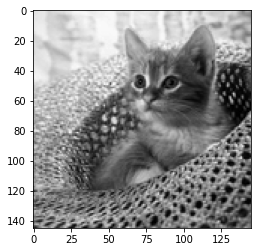

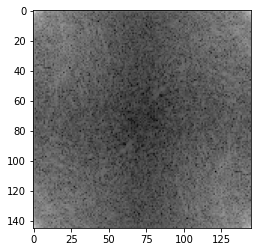

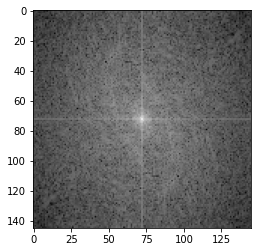

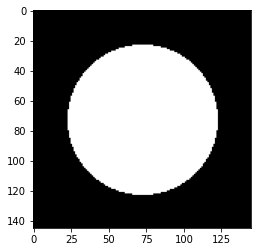

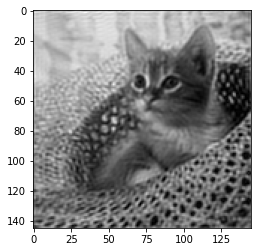

In [68]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
# f(x,y)
f = cv2.imread("/content/test.png",0)
plt.imshow(f,cmap='gray');
plt.show()
# transform image f(x,y) into frequency domain
# F(u,v)
F = np.fft.fft2(f) # transform into frequency domain
plt.imshow(np.log1p(np.abs(F)),cmap='gray') # low freq at corner and high freq at center
plt.show()

Fshift = np.fft.fftshift(F)
plt.imshow(np.log1p(np.abs(Fshift)),cmap='gray') # low freq at center and high freq at corner
plt.show()

# Creating the ideal low pass filter
M,N = f.shape
H = np.zeros((M,N),dtype=np.float32)

D0 = 50 # cutoff frequency
for u in range(M):
  for v in range(N):
    D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
    if D <= D0 :
      H[u,v] = 1
    else :
      H[u,v] = 0

plt.imshow(H,cmap='gray')
plt.show()

# Filtered image in frequency Domain
Gshift = Fshift*H # low freq at center and high freq at corner
plt.imshow(np.log1p(np.abs(Gshift)),cmap='gray')

# Inverse Filtering
# F(u,v)
G = np.fft.ifftshift(Gshift) # transform into frequency domain
plt.imshow(np.log1p(np.abs(F)),cmap='gray') # low freq at corner and high freq at center
g = np.abs(np.fft.ifft2(G))
cv2.imwrite('out1_ideal_low_pass_filter.png',g)
plt.imshow(g,cmap='gray');  
plt.show()  

### **Gaussian High Pass Filtering**

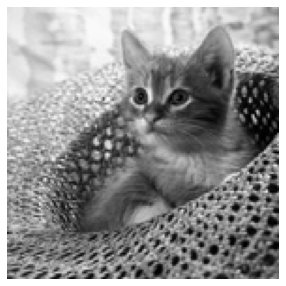

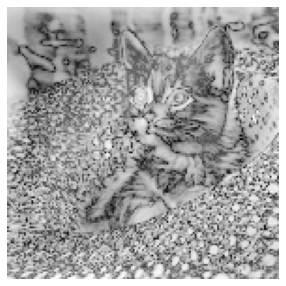

In [66]:
# open the image f
f = cv2.imread('/content/test.png',0)

plt.figure(figsize=(5,5))
plt.imshow(f, cmap='gray')
plt.axis('off')
plt.show()

# transform the image into frequency domain, f --> F
F = np.fft.fft2(f)
Fshift = np.fft.fftshift(F)

# Create filter H
M,N = f.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 3
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        H[u,v] = np.exp(-D**2/(2*D0*D0))

# Gaussian: High pass filter
HPF = 1 - H

# Image Filters
Gshift = Fshift * HPF
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))
cv2.imwrite('out2_gaussian_high_pass_filter.png',g)

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(g)), cmap='gray')
plt.axis('off')
plt.show()


### **K means Clustering**

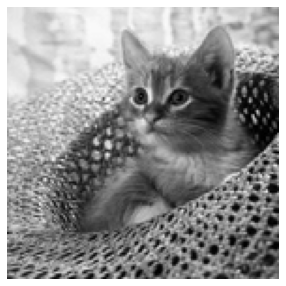

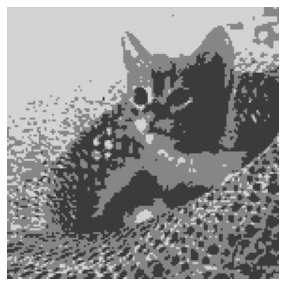

In [69]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2 as cv

img = cv.imread('/content/test.png',1)
plt.figure(figsize=(5,5))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()
# https://appdividend.com/2022/03/18/how-to-access-pixel-data-in-image-using-python-opencv/
# print(len(img),' ',len(img[0]))
'''
There are 3 features, say, R,G,B. 
So we need to reshape the image to an array of Mx3 size (M is number of pixels in image).
 And after the clustering, we apply centroid values (it is also R,G,B) to all pixels,
  such that resulting image will have specified number of colors.
 And again we need to reshape it back to the shape of original image. 
'''
Z = img.reshape((-1,len(img)*len(img[0])*3))
# convert to np.float32
Z = np.float32(Z)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
ret,label,center=cv.kmeans(Z,K,None,criteria,10,cv.KMEANS_PP_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))
cv2.imwrite('out3_k_means_clustering.png',res2)
plt.figure(figsize=(5,5))
plt.imshow(res2, cmap='gray')
plt.axis('off')
plt.show()
cv.waitKey(0)
cv.destroyAllWindows()

### **Erosion using Kernel as Mask**

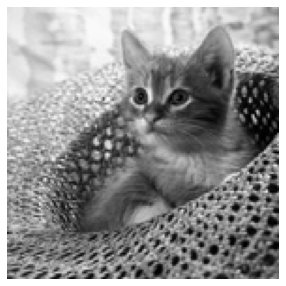

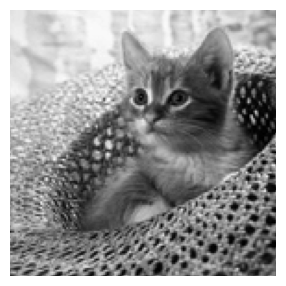

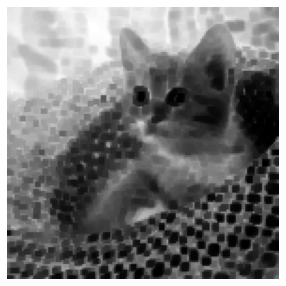

In [77]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
# padding
def padding(originalImg, padSize):
    padImg = np.ones((rows+2*padSize, columns+2*padSize), dtype=np.uint8)*np.inf
    # using Slicing
    padImg[padSize:rows+padSize, padSize:columns+padSize] = originalImg
    
    return padImg
# Morphological Erosion
def Erosion(padImg, kernel, size):
    output = np.zeros((rows, columns), dtype=np.uint8)
    for i in range(0, rows):
        for j in range(0, columns):
            # Slicing
            portion = padImg[i:i+size, j:j+size]
            portion1 = portion.flatten() # convert to 1d
            portion2 = kernel.flatten()
            # sum of kernel and window
            p1 = (np.sum(portion1))
            p2 = (np.sum(portion2))*255
            # if Fit condition satisfies
            if p1 == p2:
                output[i, j] = 255
            else:
                output[i, j] = np.min(portion1)
    return output


size = 3
# Structuring Element
kernel = np.ones((size, size), np.uint8)

# padding size
p_size = size//2 # floor division = 9 


# image reading
orginalImg = cv.imread('/content/test.png', 0)
plt.figure(figsize=(5,5))
plt.imshow(orginalImg, cmap='gray')
plt.axis('off')
plt.show()


# getting size of image
rows = orginalImg.shape[0]
columns = orginalImg.shape[1]

# padding function call
padImg = padding(orginalImg, p_size)
plt.figure(figsize=(5,5))
plt.imshow(padImg, cmap='gray')
plt.axis('off')
plt.show()


# Morphological Erosion
Ero = Erosion(padImg, kernel, size)
# erode image show
cv2.imwrite('out4_erosion.png',Ero)
plt.figure(figsize=(5,5))
plt.imshow(Ero, cmap='gray')
plt.axis('off')
plt.show()
